## References

https://stackoverflow.com/questions/36405502/matplotlib-3d-plot-color-coding-by-value-range

https://likegeeks.com/3d-plotting-in-python/

https://matplotlib.org/stable/tutorials/colors/colormaps.html

https://blog.faradars.org/lvq-network-in-python/

## **Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## **Training Samples**

In [128]:
X = np.array([[1   , 0.7 , 0.1 ],
              [1   , 1   , 1   ],
              [0.25, 0.95, 0.9 ],
              [0.1 , 0.95, 0.85],
              [0.87, 0   , 0.1 ],
              [0.82, 0.2 , 0.14],
              [0.8 , 0.2 , 0.2 ],
              [0   , 0.85, 1   ],
              [1   , 0   , 0   ],
              [0.17, 1   , 0.8 ],
              [0.9 , 0.1 , 0.1 ],
              [0.85, 0.2 , 0.2 ],
              [0.2 , 0.9 , 0.8 ],
              [0.3 , 0.9 , 0.9 ],
              [0   , 1   , 1   ],
              [0.1 , 0.85, 0.9 ],
              [0.92, 0.15, 0.1 ],
              [1   , 0.13, 0.2 ]])
X.shape

(18, 3)

In [129]:
Y = np.array([[0],
              [1],
              [1],
              [1],
              [0],
              [0],
              [0],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1],
              [1],
              [1],
              [1],
              [0],
              [0]])
Y.shape

(18, 1)

## **Plot Data in 3D**

In [130]:
##### Plot Samples in 3D #####
def plot(X, Y, mode=0):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    if mode==1:
        # to make prototypes with different colors
        Y[0] = 2
        Y[1] = 3
    
    c = (Y)

    img = ax.scatter(X[:,0], X[:,1], X[:,2], c = c, cmap = 'hsv')
    fig.colorbar(img)
    plt.show()

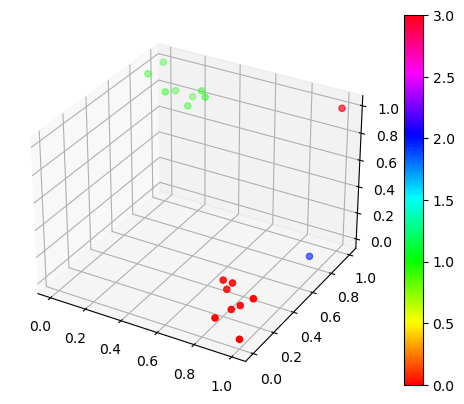

In [131]:
plot(X,Y, mode=1)

## **LVQ1 Model Implementation From Scratch**

In [132]:
def dist(a,b, mode=0):
    # Function is implemented with different modes but mode 0 is used in code
    if mode==0:
        diff = a - b
        return np.sqrt(np.dot(diff.T, diff))
    
    elif mode==1:
        return np.sqrt(np.sum(np.square(a - b)))
    
    elif mode==2:
        return np.linalg.norm(a-b)
    
    elif mode==3:
        out = 0
        for i in range(len(a)):
            out += np.power(a[i] - b[i],2)

        return np.sqrt(out)

In [423]:
##### Implement your LVQ1 model here#####

class LVQ:

    def __init__(self, epochs=10, alpha=0.03, no_classes=2, decay=False):
        self.epochs = epochs
        self.alpha = alpha
        self.no_classes = no_classes
        self.decay = decay
        
    
    # decay lr for training
    def lr_decay(self, epoch):
        self.alpha = self.alpha * (1.0-(epoch/self.epochs))
        
        
    # seperate first entries as prototypes
    def select_prototypes_and_set_data(self, X, Y):
        # I tried to code with a general mode which all the prototypes comes at the beginnging of the dataset. One prototype for each class
        self.weights = np.array([X[i] for i in range(self.no_classes)])
        self.X = X[self.no_classes:]
        self.Y = Y[self.no_classes:]


    # find the closest prototype for each given input 
    # mode 0 for training - mode 1 for testing
    def winner(self, sample_index=None, mode=0, raw_test_data=None):
        D = np.zeros(self.no_classes)
        for j in range(len(D)):
            if mode==0:
                data = self.X[sample_index]
            elif mode==1:
                data = raw_test_data[0]

            D[j] = dist(data,self.weights[j])

            
        return np.argmin(D)
        
    
    # updates the winning parameter vector
    def update(self, winner, sample_index):
        if self.Y[sample_index][0] == winner:
            self.weights[winner] = self.weights[winner] + self.alpha * (self.X[sample_index] - self.weights[winner])
        else:
            self.weights[winner] = self.weights[winner] - self.alpha * (self.X[sample_index] - self.weights[winner])
        

    # train the network
    def train(self, X, Y):
        self.select_prototypes_and_set_data(X, Y)
        for i in range(self.epochs):
            if self.decay:
                self.lr_decay(i)
            for j in range(len(self.X)):
                winner_index = self.winner(j)
                self.update(winner_index, j)
         

    # retrun the prototypes with data in intial format
    def return_weights_in_main_format(self):
        X = np.concatenate((self.weights, self.X))
        
        Y_old = self.Y.tolist()
        Y = [[i] for i in range(self.no_classes)]
        for i in range(len(Y_old)):
            Y.append(Y_old[i])
        
        return X, np.array(Y)

## **Train Model**

In [424]:
# because of learning rate decay, more epochs are needed. It can be tested by changing the decay parameter. It is false for faster approaching here.
lvq_network = LVQ(epochs=20, alpha=0.03, no_classes=2, decay=False)
lvq_network.train(X, Y)

In [425]:
new_X, new_Y = lvq_network.return_weights_in_main_format()

## **Plot Data in 3D**

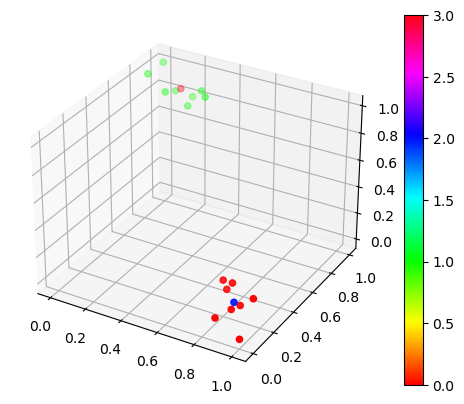

In [426]:
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
plot(new_X, new_Y, mode=1)

## **Test Model**

In [420]:
##### Test The Model With The Given Sample #####

test_sample = np.array([[0.19, 0.93, 0.88]])

In [427]:
lvq_network.winner(mode=1, raw_test_data=test_sample)
# The given data belongs to class 1

1